importing modules

In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import mnist 
from keras.datasets import cifar10
import time
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

data manipulation

In [2]:
gpus = tf.config.list_physical_devices('GPU')


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255







RMSprop optimization

In [11]:
model_1 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_1.summary()

model_1.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T1= time.time()
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T2= time.time()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 39ms/step - loss: 1.6100 - accuracy: 0.6877 - val_loss: 1.0349 - val_accuracy: 0.8443
Epoch 2/500
10/10 [==============================] - 0s 17ms/step - loss: 0.9098 - accuracy: 0.8586 - val_loss: 0.8105 - val_accuracy: 0.8720
Epoch 3/500
10/10 [==============================] - 0s 18ms/step - loss: 0.7468 - accuracy: 0.8851 - val_loss: 0.6845 - val_accuracy: 0.8994
Epoch 4/500
10/10 

evaluating 

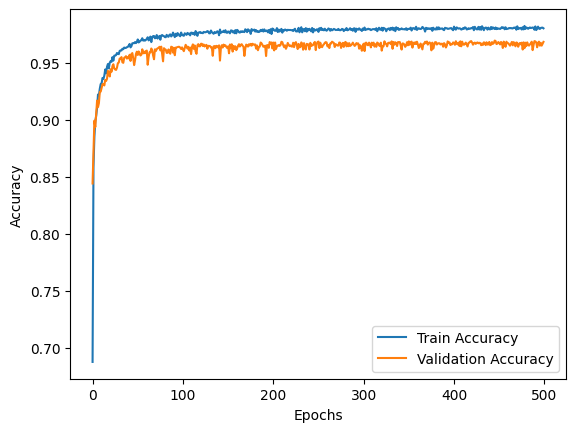

313/313 [==============================] - 1s 4ms/step - loss: 0.2321 - accuracy: 0.9736
Test Loss: 0.23205164074897766
Test Accuracy: 0.9735999703407288
Time taken: 84.96390438079834


In [12]:
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_1.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T2-T1}')

Nadam

In [13]:
model_2 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_2.summary()

model_2.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T3= time.time()
history_2 = model_2.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T4= time.time()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 35ms/step - loss: 2.0936 - accuracy: 0.5768 - val_loss: 1.4025 - val_accuracy: 0.8088
Epoch 2/500
10/10 [==============================] - 0s 17ms/step - loss: 1.1315 - accuracy: 0.8396 - val_loss: 0.9170 - val_accuracy: 0.8691
Epoch 3/500
10/10 [==============================] - 0s 17ms/step - loss: 0.8287 - accuracy: 0.8799 - val_loss: 0.7499 - val_accuracy: 0.8913
Epoch 4/500
10/10 

evaluating

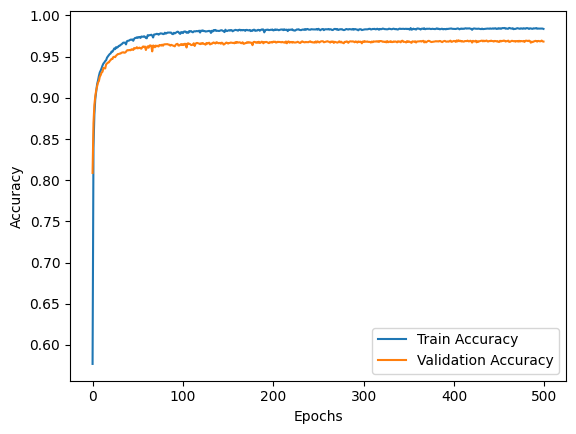

313/313 [==============================] - 1s 4ms/step - loss: 0.2315 - accuracy: 0.9726
Test Loss: 0.23153720796108246
Test Accuracy: 0.972599983215332
Time taken: 85.80857038497925


In [14]:
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_2.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T4-T3}')

NAG

In [15]:
model_3 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_3.summary()

model_3.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T5= time.time()
history_3 = model_3.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T6= time.time()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 35ms/step - loss: 2.8149 - accuracy: 0.0947 - val_loss: 2.7748 - val_accuracy: 0.1061
Epoch 2/500
10/10 [==============================] - 0s 17ms/step - loss: 2.7371 - accuracy: 0.1217 - val_loss: 2.6854 - val_accuracy: 0.1592
Epoch 3/500
10/10 [==============================] - 0s 16ms/step - loss: 2.6446 - accuracy: 0.2046 - val_loss: 2.5946 - val_accuracy: 0.2657
Epoch 4/500
10/10 

evaluating

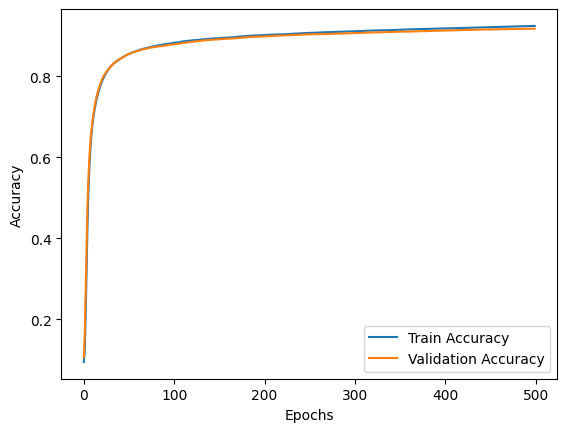

313/313 [==============================] - 1s 4ms/step - loss: 0.6844 - accuracy: 0.9241
Test Loss: 0.6843775510787964
Test Accuracy: 0.9240999817848206
Time taken: 80.18423104286194


In [16]:
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_3.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T6-T5}')

SGDR

In [9]:
initial_lr = 0.01
t_0 = 10  # Number of steps for the first cycle
t_mult = 2  # Factor by which t_0 is multiplied after each cycle

lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_lr,
    first_decay_steps=t_0,
    t_mul=t_mult
)

model_4 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_4.summary()

model_4.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T7= time.time()
history_4 = model_4.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T8= time.time()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 41ms/step - loss: 2.8283 - accuracy: 0.0987 - val_loss: 2.8013 - val_accuracy: 0.1082
Epoch 2/500
10/10 [==============================] - 0s 19ms/step - loss: 2.7557 - accuracy: 0.1285 - val_loss: 2.7087 - val_accuracy: 0.1539
Epoch 3/500
10/10 [==============================] - 0s 17ms/step - loss: 2.6939 - accuracy: 0.1631 - val_loss: 2.6873 - val_accuracy: 0.1679
Epoch 4/500
10/10 

evaluating

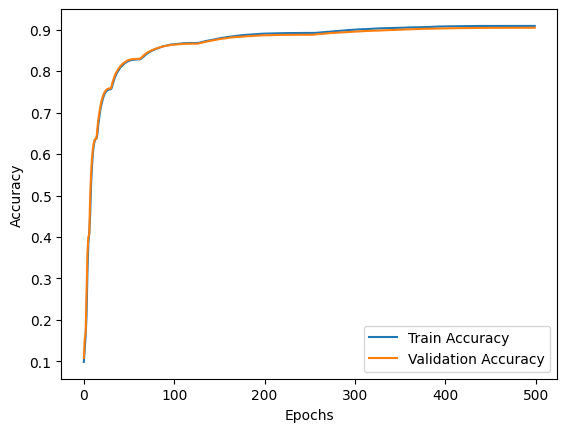

313/313 [==============================] - 1s 4ms/step - loss: 0.7632 - accuracy: 0.9140
Test Loss: 0.7631556391716003
Test Accuracy: 0.9139999747276306
Time taken: 88.05401277542114


In [10]:
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_4.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T8-T7}')

Learning Rate Schedulers(Exponential Decay)

In [7]:
initial_lr = 0.01  # Starting learning rate
decay_rate = 0.1   # Factor by which the learning rate decays
decay_steps = 1000 # How often to apply the decay

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=False  # If True, applies decay in discrete intervals (staircase effect)
)

model_5 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_5.summary()
model_5.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T9= time.time()
history_5 = model_5.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T10= time.time()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 42ms/step - loss: 2.8178 - accuracy: 0.1274 - val_loss: 2.7393 - val_accuracy: 0.1574
Epoch 2/500
10/10 [==============================] - 0s 18ms/step - loss: 2.6896 - accuracy: 0.1991 - val_loss: 2.6291 - val_accuracy: 0.2508
Epoch 3/500
10/10 [==============================] - 0s 17ms/step - loss: 2.5854 - accuracy: 0.3009 - val_loss: 2.5346 - val_accuracy: 0.3586
Epoch 4/500
10/10 

evaluating

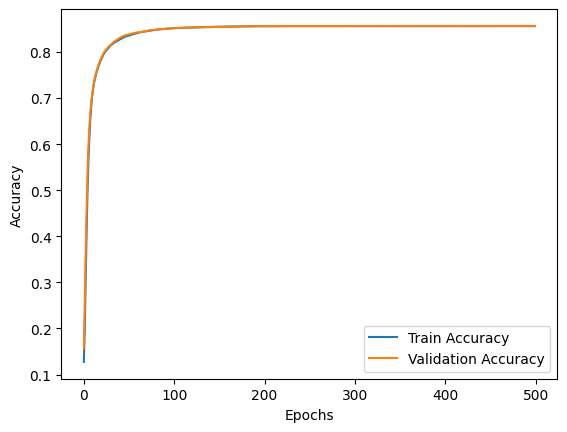

313/313 [==============================] - 1s 4ms/step - loss: 1.0971 - accuracy: 0.8620
Test Loss: 1.0971167087554932
Test Accuracy: 0.8619999885559082
Time taken: 84.7626621723175


In [8]:
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_5.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T10-T9}')

Learning Rate Schedulers(Step Decay)

In [5]:
initial_lr = 0.01  # Initial learning rate
decay_steps = [1000, 2000, 3000]  # Step intervals at which the learning rate drops
lr_values = [initial_lr, 0.005, 0.001, 0.0001]  # Learning rates at each interval

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=decay_steps,
    values=lr_values
)

model_6 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_6.summary()
model_6.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T11= time.time()
history_6 = model_6.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T12= time.time()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 43ms/step - loss: 2.7190 - accuracy: 0.1487 - val_loss: 2.6617 - val_accuracy: 0.1890
Epoch 2/500
10/10 [==============================] - 0s 20ms/step - loss: 2.6222 - accuracy: 0.2370 - val_loss: 2.5719 - val_accuracy: 0.3051
Epoch 3/500
10/10 [==============================] - 0s 18ms/step - loss: 2.5344 - accuracy: 0.3558 - val_loss: 2.4887 - val_accuracy: 0.4267
Epoch 4/500
10/10 

evaluating

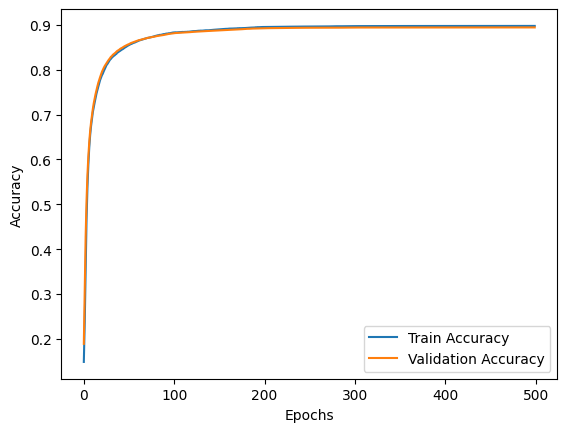

313/313 [==============================] - 1s 3ms/step - loss: 0.8222 - accuracy: 0.9018
Test Loss: 0.8221585154533386
Test Accuracy: 0.9017999768257141
Time taken: 79.81408047676086


In [6]:
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_6.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T12-T11}')

In [3]:
model_6 = models.Sequential(
    [
        layers.Input(shape=(28*28)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.000001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.000001))
    ]
)
model_6.summary()
model_6.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T11= time.time()
history_6 = model_6.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T12= time.time()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 42ms/step - loss: 2.3668 - accuracy: 0.0968 - val_loss: 2.3549 - val_accuracy: 0.0987
Epoch 2/500
10/10 [==============================] - 0s 16ms/step - loss: 2.3532 - accuracy: 0.1005 - val_loss: 2.3418 - val_accuracy: 0.1015
Epoch 3/500
10/10 [==============================] - 0s 17ms/step - loss: 2.3400 - accuracy: 0.1039 - val_loss: 2.3290 - val_accuracy: 0.1054
Epoch 4/500
10/10 [=

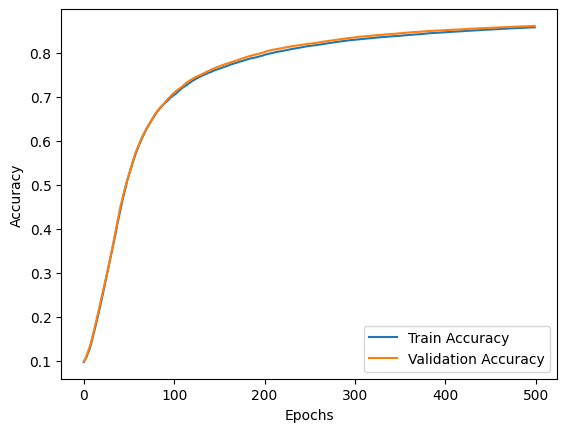

313/313 [==============================] - 1s 4ms/step - loss: 0.6006 - accuracy: 0.8674
Test Loss: 0.6005576252937317
Test Accuracy: 0.8673999905586243
Time taken: 88.14282250404358


In [4]:
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_6.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T12-T11}')